In [1]:
# Import necessary packages
import networkx as nx
import pickle
import evaluate as ev
import numpy as np

Specify pickle file location here (of graph object list and properties list)

In [2]:
# Path location for saved data
savelocG=r"sliced_data/NEW_relaxed_connected_cavemen_graphs_50.pkl"
savelocP=r"sliced_data/NEW_relaxed_connected_cavemen_properties_50.pkl"

# save file for csv (unique to graphs)
#csv_save_loc = savelocG.split('_')[-5]
csv_save_loc =savelocG.split('/')[-1]
csv_save_loc='LPA_'+csv_save_loc + "num-cluster"
print(csv_save_loc)

LPA_NEW_relaxed_connected_cavemen_graphs_50.pklnum-cluster


In [3]:
# Load data from pickle files
with open(savelocG, "rb") as input_file:
    graphs = pickle.load(input_file)

with open(savelocP, "rb") as input_file:
    properties = pickle.load(input_file)
print(f'Loaded Graphs: {len(graphs)}\nLoaded Properties: {len(properties)}')

Loaded Graphs: 50
Loaded Properties: 50


In [4]:
#Slice
# graphs=graphs[:100]
# properties=properties[:100]

In [5]:
for i in properties:
    np.set_printoptions(suppress=True)
    print(i)

[10. 45.  9.  1.]
[20.         90.          9.          0.47368421]
[ 30.         135.           9.           0.31034483]
[ 40.         180.           9.           0.23076923]
[ 50.         225.           9.           0.18367347]
[ 60.         270.           9.           0.15254237]
[ 70.         315.           9.           0.13043478]
[ 80.         360.           9.           0.11392405]
[ 90.        405.          9.          0.1011236]
[100.         450.           9.           0.09090909]
[110.         495.           9.           0.08256881]
[120.         540.           9.           0.07563025]
[130.         585.           9.           0.06976744]
[140.        630.          9.          0.0647482]
[150.         675.           9.           0.06040268]
[160.         720.           9.           0.05660377]
[170.         765.           9.           0.05325444]
[180.         810.           9.           0.05027933]
[190.         855.           9.           0.04761905]
[200.         900.    

[number of nodes, number of edges, avg_degree, density]

In [6]:
def print_properties(arr):
    str = "Properties\n"
    str += f"Nodes = {arr[0]} | "
    str += f"Edges = {arr[1]} | "
    str += f"Average Degree = {arr[2]} | "
    str += f"Density = {arr[3]} | "
    print(str)

def extract_properties(arr):
    return [int(arr[0]), int(arr[1]), arr[2], arr[3]]

Properties
Nodes = 10.0 | Edges = 45.0 | Average Degree = 9.0 | Density = 1.0 | 


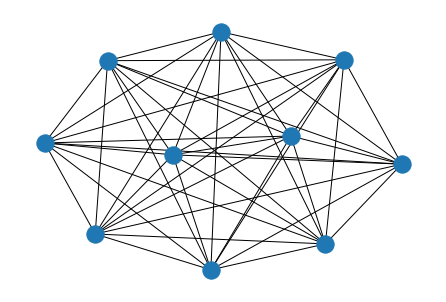

In [7]:
# Sanity check 
for g,p in zip(graphs, properties):
    nx.draw(g)
    print_properties(p)
    break

## HCS Algorithm 
#### Test graphs using HCS algorithm and analyze results

In [8]:
# Install dependency
# !pip install netgraph

In [9]:
from networkx.algorithms import community
from netgraph import Graph
import matplotlib.pyplot as plt
from hcs_module import HCS,labelled_HCS
import csvwriter as cvw

In [10]:
# Helper function to generate node-community dict for netgraph color function
def node_comm_dict(labels):
    out = dict()
    for (node, comm) in enumerate(labels):
        out[node] = comm
    return out


In [11]:
# Choose second graph in the array
G = graphs[2].copy()

In [12]:
# Check the HCS algorithm on a graph
HCS_G = HCS(G.copy())
labels, itr = labelled_HCS(G.copy())
node_to_community= node_comm_dict(labels)

cutratio = ev.cut_ratio(G,itr)
avg_internal_density= ev.avg_internal_density(G,itr)
coverage, performance = ev.cov_per(G,itr)
modularity = ev.modularity(G,itr)

print(extract_properties(properties[2]))
print(cutratio, avg_internal_density, coverage, performance, modularity)


[30, 135, 9.0, 0.3103448275862069]
0.04 0.9037037037037038 0.9037037037037037 0.9402298850574713 0.5702880658436214


### Default function to run all graphs and cluster them

In [13]:
import timeit
from networkx.algorithms import community
from IPython.display import clear_output, display
def evaluate_graphs(graphs):
    csvwriter= cvw.CustomCSV(cols=cvw.CustomCSV.ALL_HEADER)
    results = []
    for idx, graph in enumerate(graphs):
        print(idx)
        G = graph.copy()
        
        # Clustering algorithm start
        start = timeit.default_timer()
        itr = community.label_propagation_communities(G)
        exec_time = timeit.default_timer() - start
        # end
        #print(exec_time)
        cutratio = ev.cut_ratio(G,itr)
        modularity = ev.modularity(G,itr)
        avg_internal_density= ev.avg_internal_density(G,itr)
        coverage, performance = ev.cov_per(G,itr)
        node_to_community= node_comm_dict(labels)
        # Number of clusters
        num_clusters = len([*itr])
        props = extract_properties(properties[idx])
        results.append([*props,cutratio, avg_internal_density,coverage, performance, modularity,exec_time,num_clusters])
        clear_output(wait=True)
    csvwriter.write_to_csv(data=results,filename=csv_save_loc)

evaluate_graphs(graphs=graphs)

> Sucessfully written to ./csvs/LPA_NEW_relaxed_connected_cavemen_graphs_50.pklnum-cluster ...


/global/scratch/saffat/miniconda3/envs/sage/lib/python3.10/site-packages/netgraph/_edge_layout.py:534: UserWarning: Edge-bundling of self-loops not supported. Self-loops are removed from the edge list.
  warnings.warn('Edge-bundling of self-loops not supported. Self-loops are removed from the edge list.')
/global/scratch/saffat/miniconda3/envs/sage/lib/python3.10/site-packages/netgraph/_edge_layout.py:761: RuntimeWarning: invalid value encountered in true_divide
  displacement = compatibility * delta / distance_squared[..., None]


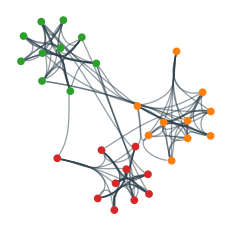

In [14]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink',
    5 : 'tab:cyan',
    6 : 'tab:olive',
    7 : 'tab:purple',
    8 : 'tab:brown'
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled'
)

plt.show()

In [14]:
# Helper function to draw both original and clustered graphs
def plot_graph_and_cluster(G, node_color_dict, key="HCS"):
    '''
      Input:
      G = The original graph
      node_color_dict = The clustered graph node community dict
      key = The name of the clustering algorithm
      
      Output: 
      void 
    '''
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Original Graph and Clustered Graph using '+ key)
    
    # Draw original graph
    nx.draw(G, ax=ax1)
    
    # Draw clusterd graph
    Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled',
      ax=ax2
    )
    plt.show()

In [15]:
#plot_graph_and_cluster(G, node_color)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load csv file containing info
raw = pd.read_csv(f"./csvs/{csv_save_loc}.csv")
raw.head()

,Number of nodes,Number of Edges,Average Degree,Density,Cut-Ratio,Avg. internal density,Coverage,Performance,Modularity,Execution Time,Num of Clusters
0,10,45,9.0,1.000000,0.0000,1.000000,1.000000,1.000000,0.000000,0.101715,1
1,20,90,9.0,0.473684,0.1000,0.888889,0.888889,0.894737,0.388642,0.001004,2
2,30,135,9.0,0.310345,0.0400,0.903704,0.903704,0.940230,0.570288,0.000855,3
3,40,180,9.0,0.230769,0.0625,0.694542,0.838889,0.797436,0.470540,0.001492,3
4,50,225,9.0,0.183673,0.0400,0.734649,0.848889,0.862857,0.572286,0.002019,4


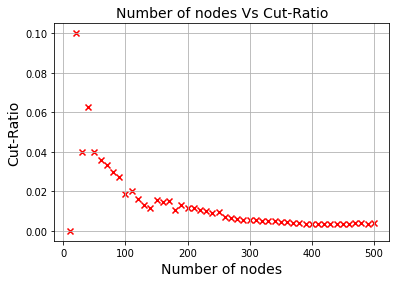

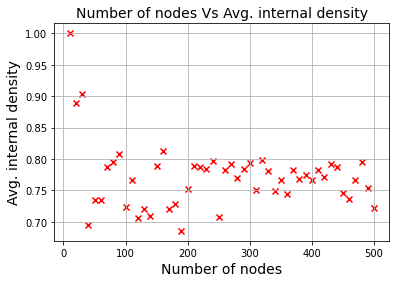

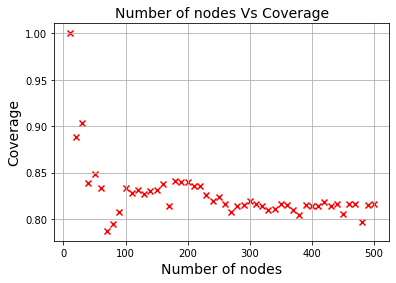

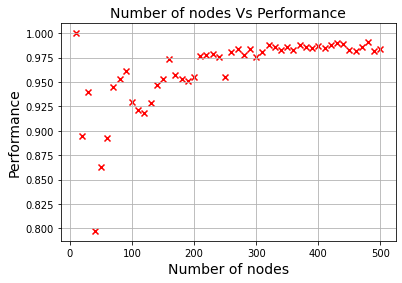

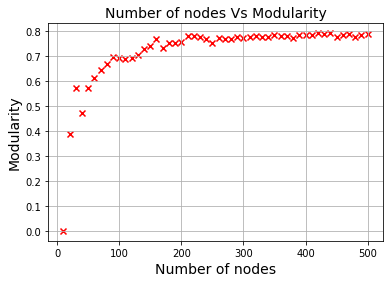

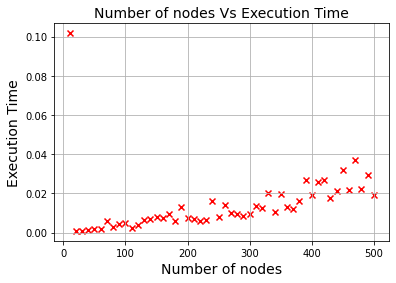

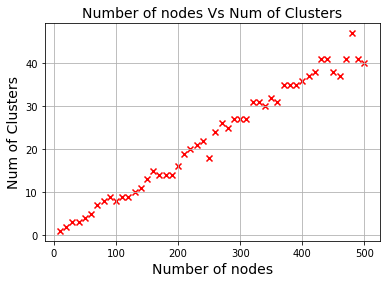

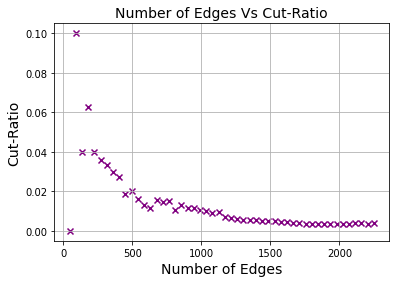

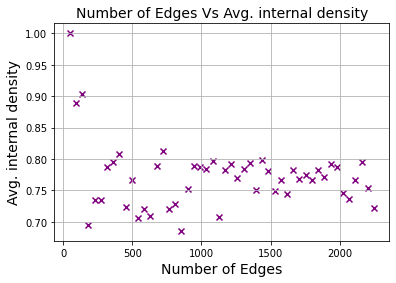

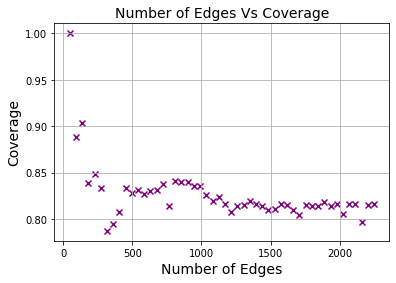

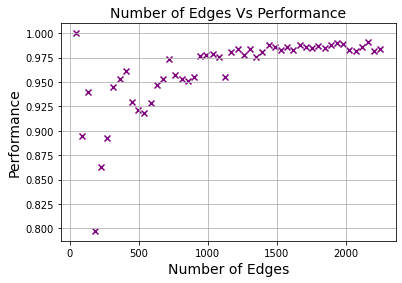

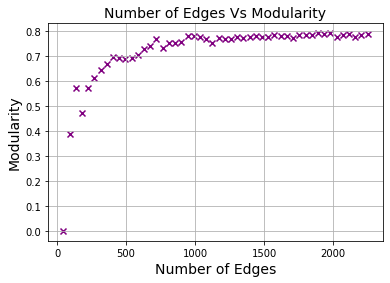

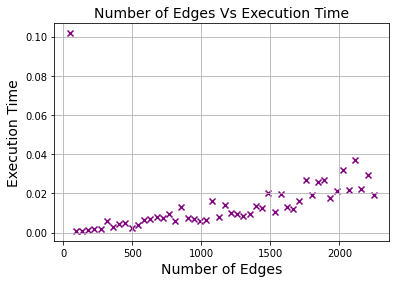

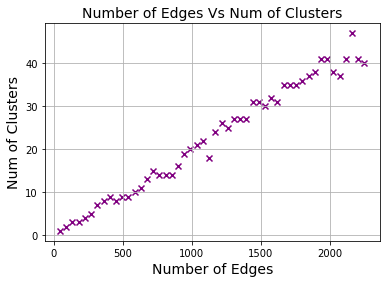

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Visualization for HCS algorithm
# Load csv file containing info
PERFOMANCE_METRICS = cvw.CustomCSV.PERFOMANCE_METRICS

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot node vs density
    plt.figure()
    plt.scatter(raw["Number of nodes"],raw[metric], color='red', marker='x')
    plt.title(f'Number of nodes Vs {metric}', fontsize=14)
    plt.xlabel('Number of nodes', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()

for idx, metric in enumerate(PERFOMANCE_METRICS):

    # Plot edges vs density
    plt.figure()
    plt.scatter(raw["Number of Edges"],raw[metric], color='purple', marker='x')
    plt.title(f'Number of Edges Vs {metric}', fontsize=14)
    plt.xlabel('Number of Edges', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.grid(True)
    plt.show()